<a href="https://colab.research.google.com/github/DomMc97/Classification-Fashion-MNIST/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Clustering of Fashion MNIST Dataset

A K-means unsupervised clustering of the Fashion MNIST dataset.

This dataset is a collection of images of fashion items sold by Zalando. Each sample is originally a grayscale image with 28x28 pixels. Each pixel has a value of the grayscale between 0 and 255. The images will be described as p-dimensional vectors $(p=28^{2}=784)$.

Each image in the dataset belongs to one of C=10 classes with the following labels: 

![](https://drive.google.com/uc?id=1EAGP0AjyptOy7uON_Gr578XyLHc1M0SA)

The dataset consists of 60000 images in the training set and 10000 additional images.



---



## Setup

In [1]:
# scientific libraries
import numpy as np
from scipy import spatial

# data analytics library
import pandas as pd

# sklearn functions
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier


# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #sets design of figures

# libraries for saving/loading data
import pickle
from google.colab import drive

Mount Google Drive.

In [2]:
# mount drive
drive.mount('/content/drive', force_remount=True)

# root of all file paths used in notebook
root = '/content/drive/My Drive/Methods for Data Science/CW3/Fashion/'

Mounted at /content/drive


In [3]:
# code reapeats until a valid input is inserted for the question.
while True:
    init_run = input('Is this the first run of the code y/n?\n')

    if init_run == 'y':
        init_run = True
        break
    elif init_run == 'n':
        init_run = False
        break
    else:
        print('Invalid input.\n')

Is this the first run of the code y/n?
n


An importation of the dataset of images using sklearn  (where the images are represented as 784-dimensional vectors) and then split into the test and train set. The dataset is ordered such that the first 60,000 images are the training set and the rest are the test set. 

In [4]:
# downloads data
mnist = fetch_openml('Fashion-MNIST', cache=False)

# images
X = mnist.data.astype('float32')
# ground truth labels
y = mnist.target.astype('int64')

# test train split
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

## Visualisation of Classes

Obtains an image from each class. 

In [5]:
# obtains one image from each class
_, idx_class = np.unique(y_train, return_index=True)

# image from each class    
images = X_train[idx_class]

A function which visulaises a set of 10 images from the Fashion-MNIST dataset.

In [6]:
def visualisation(data, name, fig_num):
    """ A function which visualises 10 images/centroids of Fashion-MNIST 
    dataset.
    Inputs:
        Data: A list of 10 lists of 784 pixel values.
        Name: The name of what is being visualised.
        Fig_num: The number of the figure.
    """

    # creates figure
    fig, axs = plt.subplots(2, 5, figsize=(15,5))
    fig.suptitle('Visualisation of Each ' + name + ' ' + fig_num, fontsize='16',
                 y=1.03)

    # plots centroid images on 2x5 grid
    for i, (ax, image) in enumerate(zip(axs.reshape(-1), data)):
        # creates subplot
        ax.imshow(image.reshape(28,28),'binary')
        
        # sets title
        title = name + ' ' + str(i)
        
        # removes grid and axes
        ax.set_title(title)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])       
    plt.show()

Display of an image from each class.

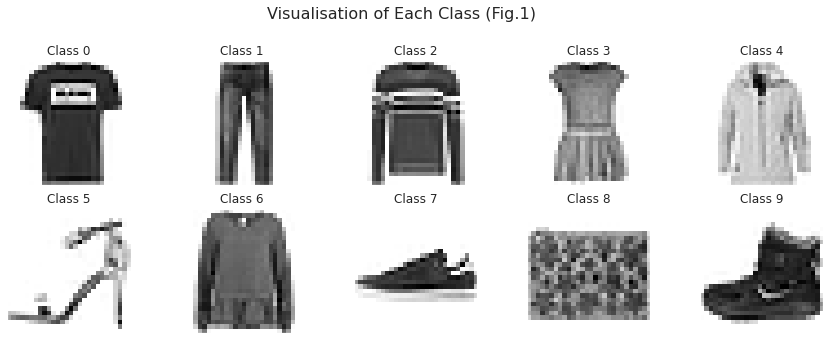

In [7]:
visualisation(images,'Class','(Fig.1)')

## K-means Clustering of Fashion MNIST.

I will use the k-means algorithm in sklearn in an
unsupervised manner to cluster the Fashion-MNIST dataset into k classes, for all values of k between $k=2$ and $k=30$. 

In [8]:
%%time
#sets a range for K
K = range(2,31)

# if initial run find results
if init_run:
    # CH scores for different k
    CH_scores = []
    # Silhoutte scores
    S_scores = []
    # Davies-Bouldin index scores
    DB_scores = []

    for k in K:
        # runs k means algorithm
        kmeans_model = KMeans(n_clusters=k, random_state=0).fit(X_train)

        # saves model of k = 10
        if k == 10:
            with open(root + 'model.sav', 'wb') as fp:
                pickle.dump(kmeans_model, fp)

        # finds CH score
        labels = kmeans_model.labels_
        CH_scores.append(metrics.calinski_harabasz_score(X_train, labels))
      
        # finds Silhouette score
        S_scores.append(metrics.silhouette_score(X_train, labels,
                                                metric='euclidean'))
      
        # finds DB score
        DB_scores.append(metrics.davies_bouldin_score(X_train, labels))

    # save results
    with open(root + 'CH_scores.txt', 'wb') as fp:
        pickle.dump(CH_scores, fp)
    
    with open(root + 'S_scores.txt', 'wb') as fp:
        pickle.dump(S_scores, fp)
    
    with open(root + 'DB_scores.txt', 'wb') as fp:
        pickle.dump(DB_scores, fp)

# else load results
else:
    CH_scores = pickle.load(open(root + 'CH_scores.txt', 'rb'))
    S_scores = pickle.load(open(root + 'S_scores.txt', 'rb'))
    DB_scores = pickle.load(open(root + 'DB_scores.txt', 'rb'))

CPU times: user 1.76 ms, sys: 50 µs, total: 1.81 ms
Wall time: 1.02 s


Each run of the K-means starts at a random clustering then begins iterating. Therefore for each different run of a k-means algorithm will likely converge to a different local optima. Leading to a randomness in the output.

To deal with this inherent randomness you could run the algorithm multiple times storing the clusterings and their quality and pick the clustering which maximises a function of the quality scores. For example for CH scores CH and Silhouette score S the function could be for example $f(CH, S)= CH + \frac{1}{S}$.

To save computational time you could use mini batch k-means which gives slightly less optimal clusterings but has much quicker run time.

## Evidence of the Existence of 10 Classes

 I'll now discuss if there is any evidence of the existence of 10 classes within the dataset.

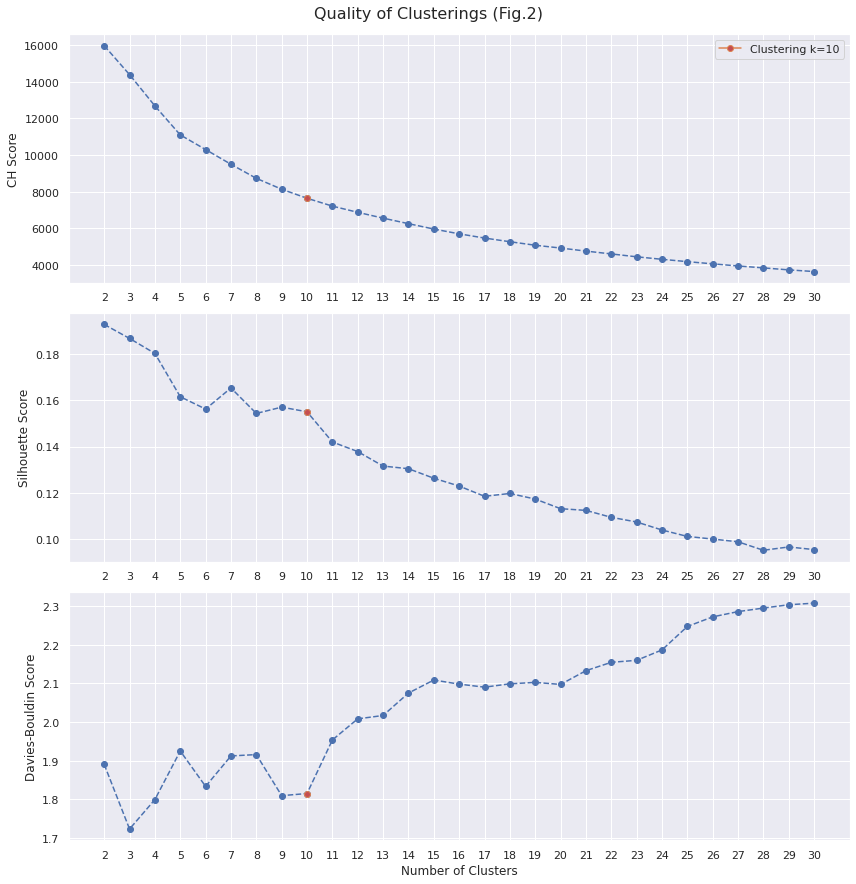

In [9]:
# creates axes
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

for ax in [ax1, ax2, ax3]:
  ax.set_xticks(K)

# creates titles
fig.suptitle('Quality of Clusterings (Fig.2)', fontsize='16', y=1.02)
ax3.set_xlabel('Number of Clusters')
ax1.set_ylabel('CH Score')
ax2.set_ylabel('Silhouette Score')
ax3.set_ylabel('Davies-Bouldin Score')

#  makes plot of CH
ax1.plot(K, CH_scores, linestyle='dashed', marker='o')

#  makes plot of SS
ax2.plot(K, S_scores, linestyle='dashed', marker='o')

#  makes plot of DB
ax3.plot(K, DB_scores, linestyle='dashed', marker='o')

# highlights point k=10
label = 'Clustering k=10'
i = K.index(10)

ax1.plot(10, CH_scores[i], marker='o',markerfacecolor='r', label=label)
ax2.plot(10, S_scores[i], marker='o',markerfacecolor='r')
ax3.plot(10, DB_scores[i], marker='o',markerfacecolor='r')
ax1.legend()

plt.tight_layout()
plt.show()

For a given clustering for clustering to be good it should maximise its CH and silhouette score and minimise its Davies-Boudin score. A good clustering of size k would indicate that there is evidence for atleast $k$ classes since clusters contain a set of 'similar' images and if the images are 'similar' we could argue they all fall into a class of an objects which look 'similar'.

Observing (Fig.1) we can see that the CH and Silhoutte score decreases with k and the Davies-Bouldin score increases with $k$ for $k > 10$. This strongly suggests that the quality of a clustering strictly decreases for any clustering with $k > 10$.

We also see sharp jumps in the Silhouette and Davies-Bouldin score for $k=10$ to $k=11$ suggesting a 'big' change in the characteristics at an upper boundary of $k=10$.

This is evidence for the existence of 10 classes due to the fact that when we split the dataset into more than 10 clusters we see a drastic decrease in the quality of the clusterings. If all clustesrs of size 11 and above are poor than we could argue there are no more than 10 classes.

Evidence which suggests we have exactly 10 classes comes from the fact that even though from (Fig.2) one could make a strong case for $k=3$ being the 'best' clustering $k=10$ is the point that we see only a decrease in scores thereafter.

The reason this suggests 10 classes even though $k=3$ gives a better clustering can explained through the following example. Let's say the cluster k=10 splits the images into the 'ground truth' 10 classes T-shirt/Top, Troussers, ..., Ankle boots. Then for k=3 we could have the 3 clusters $ C_{1} = $ {T-shirt/Top, Coat, Pullover, Dress, Shirt}, $ C_{2} = $ {Trousers, Bag}, $ C_{3} = $ {Sandal, Sneaker, Ankle Boots} visually thinking about what the objects would look like we would expect these 3 clusters to have greater dissimilarity than the 10 even though there are actually more than 3 classes. But if we then try to split into 11 clusters by splitting the class T-shirts into 2, these 2 clusters would be similar meaning a poor clustering score. Therefore to determine the number of classes we want find a $k^{*}$ such that clustering qualities decrease for all  $ k > k^{*} $ i.e in our case $k=10$.

## Visualisation of the Cluster Centroids

I'll now visualise the centroid of each of the 10 clusters from the k-means clustering I obtained for $k=10$.

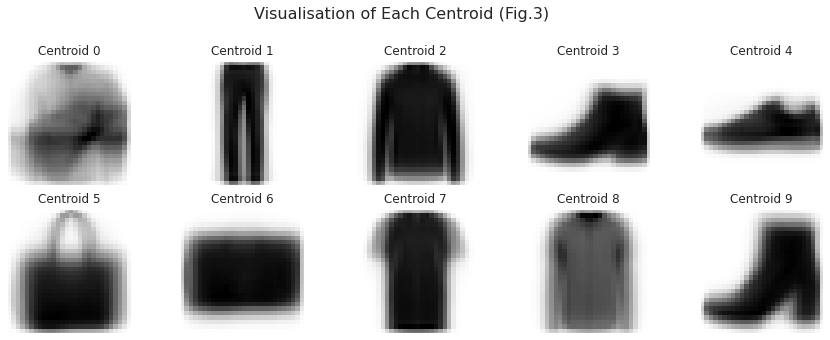

In [10]:
# obtains centroids of k_means clustering k=10 
kmeans_model = pickle.load(open(root + 'model.sav', 'rb'))
centroids = kmeans_model.cluster_centers_

# visualises centroids 
visualisation(centroids, 'Centroid', '(Fig.3)')

## k-NN Classifier

I'll now use the k-means clustering with $k=10$ as a kNN classifier for the test set. 

---


**kNN:**

kNN is the k-nearest neighbours algorithm it's a supervised machine learning algorithm that can be used to solve classification problems.

Given a dataset $\{{\vec{x}^{(i)}}\}^{N}_{i=1} \in \mathbb{R}^{p}$ with a classification $ \{{\vec{y}^{(i)}}\}^{N}_{i=1} \in C_{q} $  where $C_{q} = \{C_1, ..., C_q\}$ and a metric $D(\vec{x}^{(i)},\vec{x}^{(j)})$.

For an input $\vec{x}^{in}$ kNN predicts it's class $ \vec{y} \in C_{q}$ by computing the metric $D(\vec{x}^{in},\vec{x}^{(i)})$ for all $\vec{x}^{(i)}$ finding the k nearest neighbours. The class prediction  $ \vec{y}$ is the modal class from the set of classes in the neighbourhood.

## Assignment of Training Set Labels

For the labels of the clusters to be used for a k-NN we need to assign a label to each image of the training set according to it's cluster label. (This is done with the assumption that we do not know the labels of the training set).


In [11]:
# k-means clustering
y_km = kmeans_model.labels_

I will use these labels to now train a k-NN classifier.

In [12]:
%%time
# trains kNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_km)

CPU times: user 12.3 s, sys: 7.97 ms, total: 12.3 s
Wall time: 12.3 s


I will use the following function to test the performance of a classifier.

In [13]:
def performance(pred, X, y):
    """A function which returns the performance metrics of a classification 
    predictions of a given pretrained model on a test set.
    Inputs:
        pred: Predictions of a trained classifier.
        X: The descriptors of a test/training set.
        y: The labels of a test/trainig set.
      Outputs:
          acc: The accuracy of a prediction.
          rec: The recall of a prediction.
          pre: The precision of a prediction.
          F1: The F1 score of a prediction.
          mat: The confsusion matrix of a prediction.
    """ 
    # performance metrics
    acc = metrics.accuracy_score(y, pred)*100
    rec = metrics.recall_score(y, pred, average='macro')
    pre = metrics.precision_score(y, pred, average='macro')
    F1 = metrics.f1_score(y, pred, average='macro')
    mat = metrics.confusion_matrix(y, pred)

    # prints results
    print('##################################')
    print('Performance Metrics for Prediction')
    print('##################################\n')
    print('The accuracy is %.1f'%acc + '%')
    print('The recall is %.3f.'%rec)
    print('The precision is %.3f.'%pre)
    print('The F1 score is %.3f.'%F1)

    # plots confusion matrix
    fig = plt.figure(figsize=(12,7))
    title ='Confusion Matrix'
    cmat = pd.crosstab(y, pred, rownames=['Actual'], colnames=['Predicted'])
    plt.title(title, fontsize='15')
    sns.heatmap(cmat, annot=True)
    plt.show()

    return acc, rec, pre, F1, mat

The performance of the clustering.

##################################
Performance Metrics for Prediction
##################################

The accuracy is 20.2%
The recall is 0.202.
The precision is 0.200.
The F1 score is 0.184.


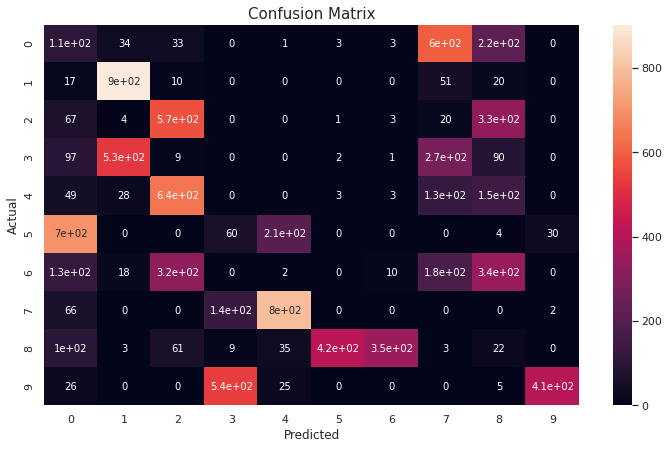

CPU times: user 648 ms, sys: 125 ms, total: 772 ms
Wall time: 1.04 s


In [14]:
%%time
# if the initial run make and save predictios
if init_run:
    pred = knn.predict(X_test)
    with open(root + 'pred.sav', 'wb') as fp:
        pickle.dump(pred, fp)
# else load predictions
else:
    pred = pickle.load(open(root + 'pred.sav', 'rb'))

# plot the performance of the model
performance(pred, X_test, y_test)

The accuracy score is low, this is a result of the fact that the k-means labels do not correspond to the 'ground truth' class labels.

So I will attempt to map the k-means labels to the 'ground truth' labels before re-training the kNN classifier with the mapped labels.

Firstly I will analyse the cluster sizes and the number of each class present in the dataset to see if there is a correspondendce.

In [15]:
# sizes of k-means clusters
print('#####################')
print('k-means Cluster Sizes')
print('#####################\n')

km_labels, km_sizes = np.unique(y_km, return_counts=True)

# print results
for label, size in zip(km_labels, km_sizes):
    print(label,'  ', size)

# counts of classes
print('\n###########################')
print('Count of Classes in X_train')
print('###########################\n')

class_labels, class_sizes = np.unique(y_train, return_counts=True)

# print results
for label, size in zip(class_labels, class_sizes):
    print(label,'  ', size)

#####################
k-means Cluster Sizes
#####################

0    7763
1    9078
2    9619
3    4295
4    6570
5    2569
6    2346
7    7391
8    7466
9    2903

###########################
Count of Classes in X_train
###########################

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000


It can be seen that there is an imbalance of class sizes likely due to the similarity of ground truth class e.g coat and pullover. This suggests that even after a remapping there will be inaccuracy in test predictions. 

For the remapping I will map a cluster label to class label according to the closeness of cluster centoids of X_train and class centoids of X_test.  

In [16]:
# create test dataframe
test = pd.DataFrame(np.hstack((X_test,y_test.reshape(10000, 1))))

# centroids
class_centroids = np.array(test.groupby([784]).mean())

# spatial organisation of centroids on a tree
kdtree = spatial.KDTree(class_centroids)

# calculates the closest class for each cluster
_ , new_labels = kdtree.query(centroids, k=1)

# class locations
locs = [np.where(y_km == i) for i in range(10)]

# remap labels
for loc, label in zip(locs, new_labels):
    y_km[loc] = label

I'll now test the performance for the new mappings.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##################################
Performance Metrics for Prediction
##################################

The accuracy is 56.9%
The recall is 0.569.
The precision is 0.478.
The F1 score is 0.513.


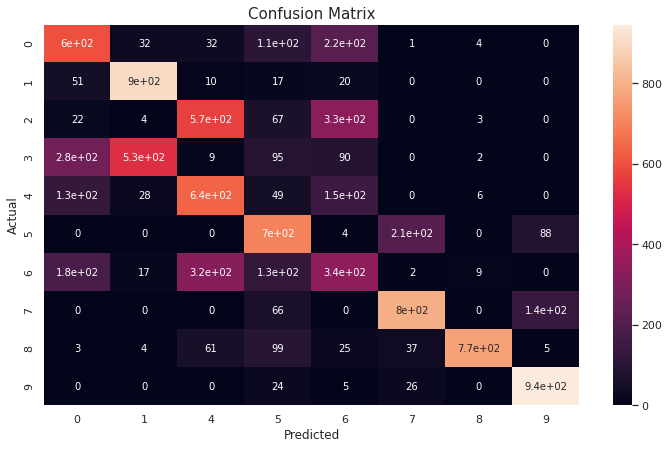

CPU times: user 12.6 s, sys: 142 ms, total: 12.7 s
Wall time: 12.8 s


In [17]:
%%time

# trains kNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_km)

# if the initial run make and save predictios
if init_run:
    pred = knn.predict(X_test)
    with open(root + 'new_pred.sav', 'wb') as fp:
        pickle.dump(pred, fp)
# else load predictions
else:
    pred = pickle.load(open(root + 'new_pred.sav', 'rb'))

# plot the performance of the model
performance(pred, X_test, y_test)

We can see as expected the remapping of labels massively impoves the accuracy of the k-NN classifier.